

## <center>**ENTREGA FINAL PROYECTO MINERIA DE DATOS**

### <center>**Nancy Alejandra Vinazco Morales  &  Maria Camila Perilla Gutierrez**
 



# **Parte 2**

Ya que el proyecto se enfoca en el aprendizaje supervisado referente a la clasificación, se realizarán diferentes propuestas basadas en dos algoritmos de clasificación, un algoritmo referente a la regresión logística regularizada y una maquina de vector soporte de clasificación.

A continuación se puede observar el Dataset mediante el cual se relizarán los algoritmos:

In [163]:
import pandas as pd
import numpy as np

In [164]:
obesity = pd.read_csv("obesity_Final2.csv",
                    sep=","
                 )

In [165]:
obesity = obesity.drop(['Unnamed: 0'], axis=1)

In [166]:
obesity.head(2)

,NObeyesdad,Edad,Altura,Antec_familiares,FAVC,NCP,CAEC,FAF,TUE,IMC
0,1.0,26.0,1.900000,1.0,1.0,3.0,2.0,1.0,0.0,22.160665
1,1.0,22.0,1.711467,1.0,1.0,3.0,2.0,2.0,1.0,17.741005


Se puede observar información refente al Dataset, el cual cuenta con 2868 registros y 10 variables

In [167]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2868 entries, 0 to 2867
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NObeyesdad        2868 non-null   float64
 1   Edad              2868 non-null   float64
 2   Altura            2868 non-null   float64
 3   Antec_familiares  2868 non-null   float64
 4   FAVC              2868 non-null   float64
 5   NCP               2868 non-null   float64
 6   CAEC              2868 non-null   float64
 7   FAF               2868 non-null   float64
 8   TUE               2868 non-null   float64
 9   IMC               2868 non-null   float64
dtypes: float64(10)
memory usage: 224.2 KB


### **A tomar en cuenta** 

Para la aplicación de los algoritmos, se tomarán en cuenta las siguientes especificaciones y variables:

* **Uso de validación cruzada simple (75% entrenamiento, 15% prueba)** <br><br>
* **Métricas a emplear: LOG-LOSS,  AUC-ROC*** <br><br>
* **Combinación de mínimo 4 hiperparámetros para cada algoritmo** <br><br>

|VARIABLE DEPENDIENTE | DESCRIPCIÓN |
|------------------------| ------ |
| *NObeyesdad* | Niveles de obesidad |

|VARIABLES INDEPENDIENTES | DESCRIPCIÓN |
|------------------------| ------ |
| *IMC* | Índice de masa corporal |
| *Altura* | Altura de la persona |
| *Edad* | Edad de la persona |
|*Antec_familiares* | Antecedentes familiares de la persona |
| *CAEC* | Nonsumo de alimentos dentre comidas | 
| *NCP* | Número de comidas principales al dia|
| *FAVC* | Consumo de alimentos ricos en calorias con frecuencia  |
| *FAF* | Frecuencia de actividad física |
| *TUE* | Tiempo usado en dispositivos tecnológicos |

### **Validación cruzada** 

In [168]:
X = obesity.drop(["NObeyesdad"], axis=1).values
y = obesity["NObeyesdad"].values

In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=68)

In [170]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2437, 9) (431, 9) (2437,) (431,)


## **Regresión logística regularizada** 

### ***Ajuste del modelo***

Para el ajuste del algoritmo de regresión logística se toma en cuenta la variación de los siguientes hiperparámetros:

|HIPERPARÁMETRO | DESCRIPCIÓN |
|------------------------| ------ |
| *Penalty* | Regularización o sanción |
| *C* | Fuerza inversa de regularización |
| *Tol* | Toleracia del criterio de parada |
|*Max_iter* | Iteraciones para lograr convergencia |
| *Solver* | Algoritmo de solución | 

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [172]:
penal = ["l1", "l2"]
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tolera = [0.000001, 0.00001, 0.0001, 0.001, 0.01]
maxiter = [1000, 10000, 100000]
sol = ["liblinear"]

LOGLOSS = []
ROCAUC = []

In [173]:
for a in penal:
  for b in C:
    for c in tolera:
      for d in maxiter:
        for e in sol:
          Model = LogisticRegression(penalty = a, C =b, tol=c, max_iter=d, solver=e, random_state=70)
          Model.fit(X_train, y_train)
          y_pre = Model.predict(X_test)

          MLL = metrics.log_loss(y_test, y_pre)
          MRU = metrics.roc_auc_score(y_test, y_pre, average=None)

          LOGLOSS.append(MLL)
          ROCAUC.append(MRU)

### ***Medidas de selección del algoritmo***

Se toman en cuenta las siguientes métricas:

|MÉTRICA | DESCRIPCIÓN |
|------------------------| ------ |
| *LOG-LOSS* | Pérdida Logarítmica |
| *ROC-AUC* | Curva característica del receptor / Puntuación del área bajo la curva  |

A continuación observamos algunos valores para cada una de las métricas de selección

In [174]:
pd.DataFrame(LOGLOSS, columns=["Pérdida Logarítmica"]).sample(n=10, random_state=40)

,Pérdida Logarítmica
138,1.843159
143,1.843159
35,1.121924
166,0.560962
149,1.843159
147,1.843159
103,0.641098
5,14.584870
190,0.480824
125,2.644528


In [175]:
pd.DataFrame(ROCAUC, columns=["LOG LOSS"]).sample(n=10, random_state=40)

,LOG LOSS
138,0.946250
143,0.946250
35,0.967639
166,0.983819
149,0.946250
147,0.946250
103,0.981215
5,0.539869
190,0.985911
125,0.921744


A continuación se evidencian las mejores métricas de las posibles combinaciones realizadas

In [176]:
pd.DataFrame(ROCAUC).max()

0    0.993212
dtype: float64

In [177]:
pd.DataFrame(LOGLOSS).min()

0    0.240413
dtype: float64

### ***Mejor combinación de hiperparámetros***

In [178]:
from sklearn.model_selection import GridSearchCV

In [179]:
combina = GridSearchCV(estimator = Model, param_grid = dict(penalty = penal, C = C, tol= tolera, max_iter=maxiter, solver=sol, random_state=[70]), scoring="neg_log_loss")
combina.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


GridSearchCV(estimator=LogisticRegression(C=1000, max_iter=100000,
                                          random_state=70, solver='liblinear',
                                          tol=0.01),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [1000, 10000, 100000],
                         'penalty': ['l1', 'l2'], 'random_state': [70],
                         'solver': ['liblinear'],
                         'tol': [1e-06, 1e-05, 0.0001, 0.001, 0.01]},
             scoring='neg_log_loss')

Se puede evidenciar la mejor combinación de los hiperparámetros, tomando en cuenta la métrica de la pérdida logarítmica, ya que está métrica es apropiada para clasificadores binarios

In [180]:
combina.best_params_

{'C': 1000,
 'max_iter': 1000,
 'penalty': 'l2',
 'random_state': 70,
 'solver': 'liblinear',
 'tol': 1e-05}

La mejor combinación de parámetros es: <br> <br>

* ***Penalty = L2 (Ridge)***
* ***C = 1000*** 
* ***Tol = 0.00001*** 
* ***Max_iter = 1000*** 
* ***Solver = Liblinear*** 

La métrica empleada para seleccionar el mejor algoritmo es el LOG-LOSS, con un valor de 0.2404.

## **Máquina de vector soporte** 

### ***Ajuste del modelo***

Para el ajuste del algoritmo de regresión logística se toma en cuenta la variación de los siguientes hiperparámetros:

|HIPERPARÁMETRO | DESCRIPCIÓN |
|------------------------| ------ |
| *Kernel* | Función de nuevo espacio dimensional |
| *C* | Fuerza inversa de regularización |
| *Tol* | Toleracia del criterio de parada |
|*Max_iter* | Iteraciones para lograr convergencia |
| *Gamma* | Curvatura en un límite de decisión | 

In [181]:
from sklearn import svm
from sklearn import metrics

In [182]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.15, random_state=68)

In [183]:
kernel2 = ["linear", "poly", "rbf"]
C2 = [0.01, 0.1, 1, 10, 100, 1000]
tolera2 = [0.000001, 0.00001, 0.0001]
maxiter2 = [1000, 10000, 100000]
Gama2 = [0.01, 0.001, 0.0001]

LOGLOSS2 = []
ROCAUC2 = []

In [184]:
for a in kernel2:
  for b in C2:
    for c in tolera2:
      for d in maxiter2:
        for e in Gama2:
          Model2 = svm.SVC(kernel=a, C= b, tol=c, max_iter=d, gamma=e, random_state=70)
          Model2.fit(X_train2, y_train2)
          y_pre2 = Model2.predict(X_test2)

          MLL2 = metrics.log_loss(y_test2, y_pre2)
          MRU2 = metrics.roc_auc_score(y_test2, y_pre2, average=None)

          LOGLOSS2.append(MLL2)
          ROCAUC2.append(MRU2)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1

### ***Medidas de selección del algoritmo***

Se toman en cuenta las siguientes métricas:

|MÉTRICA | DESCRIPCIÓN |
|------------------------| ------ |
| *LOG-LOSS* | Pérdida Logarítmica |
| *ROC-AUC* | Curva característica del receptor / Puntuación del área bajo la curva  |

A continuación observamos algunos valores para cada una de las métricas de selección

In [185]:
pd.DataFrame(LOGLOSS2, columns=["Pérdida Logarítmica"]).sample(n=10, random_state=40)

,Pérdida Logarítmica
449,0.320551
169,2.324001
375,0.400682
379,0.480822
267,0.240413
445,0.160276
0,0.320551
77,0.240413
140,0.961651
43,0.160276


In [186]:
pd.DataFrame(ROCAUC2, columns=["ROC-AUC"]).sample(n=10, random_state=40)

,ROC-AUC
449,0.991120
169,0.937282
375,0.986979
379,0.985399
267,0.993212
445,0.995816
0,0.991120
77,0.993212
140,0.972847
43,0.995816


A continuación se evidencian las mejores métricas de las posibles combinaciones realizadas

In [187]:
pd.DataFrame(ROCAUC2).max()

0    0.997908
dtype: float64

In [188]:
pd.DataFrame(LOGLOSS2).min()

0    0.080136
dtype: float64

La métrica empleada para seleccionar el mejor algoritmo es el LOG-LOSS, con un valor de 0.080136.

### ***Mejor combinación de hiperparámetros***

In [189]:
combina2 = GridSearchCV(estimator = Model2, param_grid = dict(kernel = kernel2, C = C2, tol= tolera2, max_iter=maxiter2, gamma=Gama2, random_state=[70]))
combina2.fit(X_train2, y_train2)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1

GridSearchCV(estimator=SVC(C=1000, gamma=0.0001, max_iter=100000,
                           random_state=70, tol=0.0001),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'max_iter': [1000, 10000, 100000],
                         'random_state': [70], 'tol': [1e-06, 1e-05, 0.0001]})

Se puede evidenciar la mejor combinación de los hiperparámetros, tomando en cuenta la métrica de la pérdida logarítmica, ya que está métrica es apropiada para clasificadores binarios

In [190]:
combina2.best_params_

{'C': 0.1,
 'gamma': 0.01,
 'kernel': 'linear',
 'max_iter': 1000,
 'random_state': 70,
 'tol': 1e-06}

La mejor combinación de parámetros es: 

* ***Kernel = Linear***
* ***C = 0.1*** 
* ***Tol = 0.000001*** 
* ***Max_iter = 1000*** 
* ***Gamma = 0.01*** 

## ***Conclusión***

Se hace uso de los algoritmos de regresión logística y una máquina de vector soporte, ya que el proceso está enfocado en el campo de clasificación, en este caso se cuenta con una variable dependiente con dos categorias (Binaria), la métrica empleada para seleccionar el mejor algoritmo es el LOG-LOSS, ya que este es una de las medidas de selección más adecuadas para tratar casos binarios, es importante tomar en cuenta que la métrica es susceptible para conjuntos de datos desequilibrados, pero ya que se aplicó anteriormente el método SMOTE, es una buena métrica de evaluación. 

Algunos aspectos a mejorar en los algoritmo estan basados en la variación de otro tipo de hiperparámetros, aplicar otro tipo de métodos para manejar datos desequilibrados, asi como el uso de otra técnica más eficiente de validación cruzada, también se puede considerar un cambio en la recategorización de la variable dependiente e incluso tomar en cuenta otro tipo experimentos y métricas para la selección.

## ***Algoritmos seleccionados***

En este apartado se muestran los algoritmos seleccionados con su combinación de hiperparámetros más adecuados y sus respectivos valores

|Regresión Logística | SVM |
|------------------------| ------ |
| *Penalty = L2* | *Kernel = Linear* |
| *C = 1000* | *C = 0.1* |
| *Tol = 0.00001* | *Tol = 0.000001* |
|*Max_iter = 1000* | *Max_iter = 1000* |
| *Solver = Liblinear* | *Gamma = 0.01* | 

## ***Ensamblaje***

### ***Ensamblaje Manual***

En relación con el método de ensamblaje la opción a emplear es la técnica de Bagging enfocado a un ensamblaje manual, esto con la selección de los mejores algoritmos mencionados anteriormente, los cuales son una regresión logística y una máquina de vector soporte, la validación cruzada aplicada es la misma que se utilizó para la selección de los algoritmos, así mismo se evaluan las métricas de la pérdida logarítmica y el ROC-AUC, dando un poco más de importancia a la métrica de la pérdida logarítmica.

In [191]:
models = {"RL":  LogisticRegression(penalty = "l2", C =1000, tol=0.00001, max_iter=1000, solver="liblinear", random_state=70),
         "SVM": svm.SVC(kernel="linear", C= 0.1, tol=0.000001, max_iter=1000, gamma=0.01, random_state=70)}

In [192]:
# Train all the models
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.15, random_state=68)

for model in models.keys():
    models[model].fit(X_train3, y_train3)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [193]:
obe = pd.concat([pd.DataFrame(X_test3), pd.DataFrame(y_test3)], axis=1)

In [194]:
# predict test for each model
y_pred3 = pd.DataFrame(index=obe.index, columns=models.keys())
for model in models.keys():
    y_pred3[model] = models[model].predict(X_test3)
    

In [195]:
LOGLOSS3 = []
ROCAUC3 = []
model3 = []

for model in models.keys():
    m1 = metrics.log_loss(y_test3, y_pred3[model])
    m2 = metrics.roc_auc_score(y_test3, y_pred3[model], average=None)  

    LOGLOSS3.append(m1)  
    ROCAUC3.append(m2)  
    model3.append(model)

Se pueden observar los modelos seleccionados y los valores de sus métricas respectivamente

In [196]:
print(model3,"Pérdida Logarítmica: ", LOGLOSS3)
print(model3,"ROC-AUC: ", ROCAUC3)

['RL', 'SVM'] Pérdida Logarítmica:  [0.24041282686680476, 0.16027645472084034]
['RL', 'SVM'] ROC-AUC:  [0.9932117329149233, 0.9958158995815899]


Se calcula la media de cada métrica con el fin de realizar comparaciones posteriores:

In [197]:
print("Pérdida Logarítmica", metrics.log_loss(y_test3, y_pred3.mean(axis=1)))
print("ROC-AUC", metrics.roc_auc_score(y_test3, y_pred3.mean(axis=1), average=None))

Pérdida Logarítmica 0.16188468483814877
ROC-AUC 0.9957941073919108


## ***Conclusiones finales***

|ALGORITMO | LOG-LOGG | ROC-AUC |
|------------------------| ------ | --- |
| *Regresión Logística* | 0.240413 | 0.993212 |
| *Máquina de vector soporte* | 0.160276 | 0.995815 |
| *Ensamblaje Manual* | 0.161885 | 0.995794 |

Se decidio emplear la técnica de ensamblaje manual puesto que con esta se pueden tomar en cuenta algoritmos anteiormente selecionados y hacer una selección más eficaz aprovechando las combinaciones de parámetros realizados, así como observar el comportamiento y rendimiento de cada algoritmo, también se consideró que es una técnica flexible ya que considera el preprocesamiento del Dataset y l selección rigurosa de predictores, procesos que se efectuaron con anterioridad.

Al hacer uso de la técnica de ensamblaje manual se puede observar que tomando en cuenta la métrica de la pérdida cuadratica, está logra una medida mejor que el algoritmo de regresión logística regularizada y muy cercana pero no mejor que al algoritmo de máquina de vector soporte. Si se toma en cuenta la métrica del AUC-ROC, se evidencia que la técnica también logra una mejor medida que la regresión logística y muy cercana pero no mejor que la máquina de vector soporte, siendo muy estrictos, el mejor algoritmo a seleccionar es una máquina vector soporte, ya que es la que presenta mejor rendimiento y valor eficaz en las métricas.

Algunos aspectos a mejorar del algoritmo final estan basados en el uso de otro tipo de técnicas de ensamblaje, recategorización de la variable objetivo, consideración de otro tipo de valores que se tomen en cuenta en los hiperparámetros, etc.

# ***Bonus***

### ***Valor singular de descomposición***

In [198]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD

La técnica a aplicar es el valor singular de descomposición singular, tomando en cuenta la reducción de 10 variables a 2 componentes

Se puede observar que el primer componente posee un 65,84% de la variación y el segundo componente un 31.11% de la variación, el 96,94% de la variación se explica en estas dos componentes

In [199]:
svd=TruncatedSVD(n_components=2)
svd.fit(X_train)
X_svd=svd.transform(X_train) 

print("shape of X_svd", X_svd.shape)
expl = svd.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))

shape of X_svd (2437, 2)
[0.65838247 0.31109954]
suma: 0.9694820117353413


Si hacemos uso de 4 componentes se puede observar que el primer componente tiene un 66,84% de la variación, el segundo un 31,11%, el tercero una variación del 1,52% y finalmente el cuarto componente una variación del 0,57% y en donde se puede decir que en 4 componentes se está campturando el 99,04% de la varianza

In [200]:
svd=TruncatedSVD(n_components=4)
svd.fit(X_train)
X_svd=svd.transform(X_train) 
 
print("shape of X_svd", X_svd.shape)
expl = svd.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))

shape of X_svd (2437, 4)
[0.65838247 0.31109954 0.01520579 0.00568407]
suma: 0.990371868590518


### ***Análisis de componentes***

Se realiza la gráfica con el fin de seleccionar el número más adecuados de componentes a usar

shape of X_svd (2437, 8)
[0.65838247 0.31109954 0.01520579 0.00568407 0.0041967  0.00272391
 0.00133078 0.00101797]
suma: 0.9945685703398204


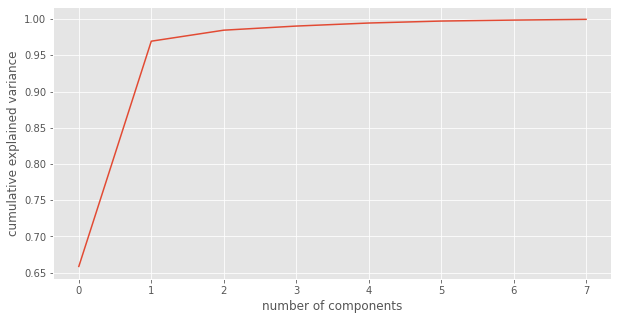

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

svd=TruncatedSVD(n_components=8)
svd.fit(X_train)
X_svd=svd.transform(X_train) 
 
print("shape of X_svd", X_svd.shape)
expl = svd.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
 

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Según la gráfica y porcentajes de varianza observados anteriormente, la mejor opción a utilizar son 2 componentes

### ***Aplicación para el algoritmo seleccionado***

A continuación se realiza el ajuste del algoritmo anteriormente seleccionado, el cual corresponde a una máquina de vector soporte, esto con el fin de decidir si aplicando reducción de dimensionalidad se observa una mejora en el algoritmo SVM o si por el contrario es más adecuado el algoritmo sin plicar reducción de la dimensionalidad

In [202]:
from sklearn.decomposition import TruncatedSVD

# define the pipeline
steps = [('svd', TruncatedSVD(n_components=2)), ('m', svm.SVC(kernel="linear", C= 0.1, tol=0.000001, max_iter=1000, gamma=0.01, random_state=70))]
model = Pipeline(steps=steps)
model.fit(X_train, y_train)
pre = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Finalmente se calculan los valores de las métricas de pérdida logarítmica y ROC-AUC

In [203]:
print("Pérdida Logarítmica", metrics.log_loss(y_test, pre))

Pérdida Logarítmica 0.24041468208126


In [204]:
print("ROC-AUC", metrics.roc_auc_score(y_test, pre, average=None))

ROC-AUC 0.993723849372385


## ***Conclusiones finales***

|ALGORITMO/TÉCNICA | LOG-LOGG | ROC-AUC |
|------------------------| ------ | --- |
| *Máquina de vector soporte* | 0.160276 | 0.995815 |
| *Valor singular de descomposición* | 0.240415 | 0.993724 |

Se ha decidido aplicar reducción de la dimensionalidad, enfocado a la técnica del valor singular de descomposición ya que el Dataset contiene algunas variables binarias con valor de 0, motivo por el cual este método suele ser más adecuado cuando se tenga este tipo de variables, también conocidos como datos escasos.

Se puede observar que aplicando una técnica de reducción de dimensionalidad no se mejora la calidad del algoritmo, ya que según las métricas de la pérdida logarítmica y el ROC-AUC, la máquina de vector soporte sin el uso de reducción de dimensionalidad es el algortimo más apropiado para este caso.

